# Letter Recognition

Submitted by - Vishal Kumar kumar.vishal318@gmail.com intern at AI Tech Systems https://www.ai-techsystems.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
letter = pd.read_csv("letter-recognition.data")
letter.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [3]:
letter.columns


Index(['T', '2', '8', '3', '5', '1', '8.1', '13', '0', '6', '6.1', '10', '8.2',
       '0.1', '8.3', '0.2', '8.4'],
      dtype='object')

In [4]:
#renaming columns
letter.columns = ["letter","x-box","y-box","width","height","onpix","x-bar","y-bar","x2bar","y2bar",
                       "xybar","x2ybar","xy2br","x-ege","xegvy","y-ege","yegvx"]

In [5]:
letter.columns

Index(['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar',
       'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2br', 'x-ege', 'xegvy',
       'y-ege', 'yegvx'],
      dtype='object')

In [6]:
letter.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [7]:
#checking for missings
letter.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
height    0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [8]:
letter.shape

(19999, 17)

In [9]:
#basic statistics of dataset
letter.describe().T

,count,mean,std,min,25%,50%,75%,max
x-box,19999.0,4.023651,1.913206,0.0,3.0,4.0,5.0,15.0
y-box,19999.0,7.035452,3.304631,0.0,5.0,7.0,9.0,15.0
width,19999.0,5.121956,2.014568,0.0,4.0,5.0,6.0,15.0
height,19999.0,5.372469,2.261445,0.0,4.0,6.0,7.0,15.0
onpix,19999.0,3.505975,2.190441,0.0,2.0,3.0,5.0,15.0
x-bar,19999.0,6.897545,2.026071,0.0,6.0,7.0,8.0,15.0
y-bar,19999.0,7.500175,2.325087,0.0,6.0,7.0,9.0,15.0
x2bar,19999.0,4.628831,2.699837,0.0,3.0,4.0,6.0,15.0
y2bar,19999.0,5.178609,2.380875,0.0,4.0,5.0,7.0,15.0
xybar,19999.0,8.282164,2.488485,0.0,7.0,8.0,10.0,15.0


In [10]:
import seaborn as sns

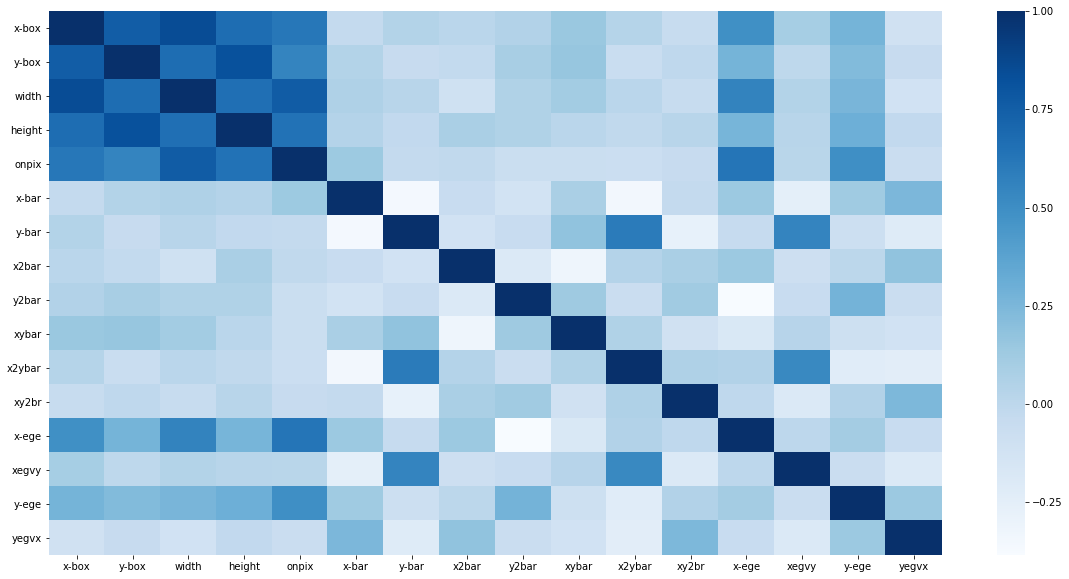

In [11]:
#checking correlation matrix using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(letter.corr(),cmap="Blues")
plt.show()

We can see that x-box and width as well as y-box and height are highly correlated positively.

Also x-bar and y-bar are highly correlated negatively.

In [12]:
letter.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


### Splitting our data into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(letter.iloc[:,1:],letter.letter,test_size = 0.2,random_state = 123)

### A model using Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()

In [17]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
import sklearn.metrics as metrics

In [19]:
#training accuracy 
metrics.accuracy_score(dt.predict(x_train),y_train)

1.0

In [20]:
#testing accuracy
metrics.accuracy_score(dt.predict(x_test),y_test)

0.87475

### Model using Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()

In [23]:
rf.fit(x_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
#trainig accuracy
metrics.accuracy_score(rf.predict(x_train),y_train)

0.9995624726545409

In [100]:
#testing accuracy
metrics.accuracy_score(rf.predict(x_test),y_test)

0.942

### Hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param = {"n_estimators":np.arange(10,100,5),
        "min_samples_leaf": np.arange(1,50,1)}

In [28]:
rf_grid = GridSearchCV(RandomForestClassifier(), cv=10,param_grid=param,n_jobs=-1)

In [29]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None,

In [30]:
rf_grid.best_params_

{'min_samples_leaf': 1, 'n_estimators': 95}

In [31]:
rf_grid.best_score_

0.9616851053190825

### Building models with best parameters

In [32]:
rf_final = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 95)

In [33]:
rf_final.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred = rf_final.predict(x_test)

In [41]:
#Training accuracy
metrics.accuracy_score(rf_final.predict(x_train),y_train)

1.0

In [42]:
#testing accuracy
metrics.accuracy_score(y_pred,y_test)

0.971

## We got an accuracy score of 97.1% on final model

In [44]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.99      1.00      1.00       172
           B       0.96      0.95      0.95       146
           C       0.99      0.96      0.98       163
           D       0.94      0.97      0.96       170
           E       0.98      0.96      0.97       167
           F       0.97      0.97      0.97       147
           G       0.97      0.99      0.98       147
           H       0.94      0.89      0.92       152
           I       0.96      0.97      0.97       162
           J       0.98      0.93      0.95       149
           K       0.93      0.94      0.93       143
           L       0.99      0.98      0.99       156
           M       0.95      0.98      0.97       150
           N       0.99      0.97      0.98       147
           O       0.96      0.98      0.97       123
           P       0.97      0.98      0.97       168
           Q       0.97      0.97      0.97       177
           R       0.92    

In [94]:
letter_list = pd.Series(letter["letter"].unique()).sort_values()

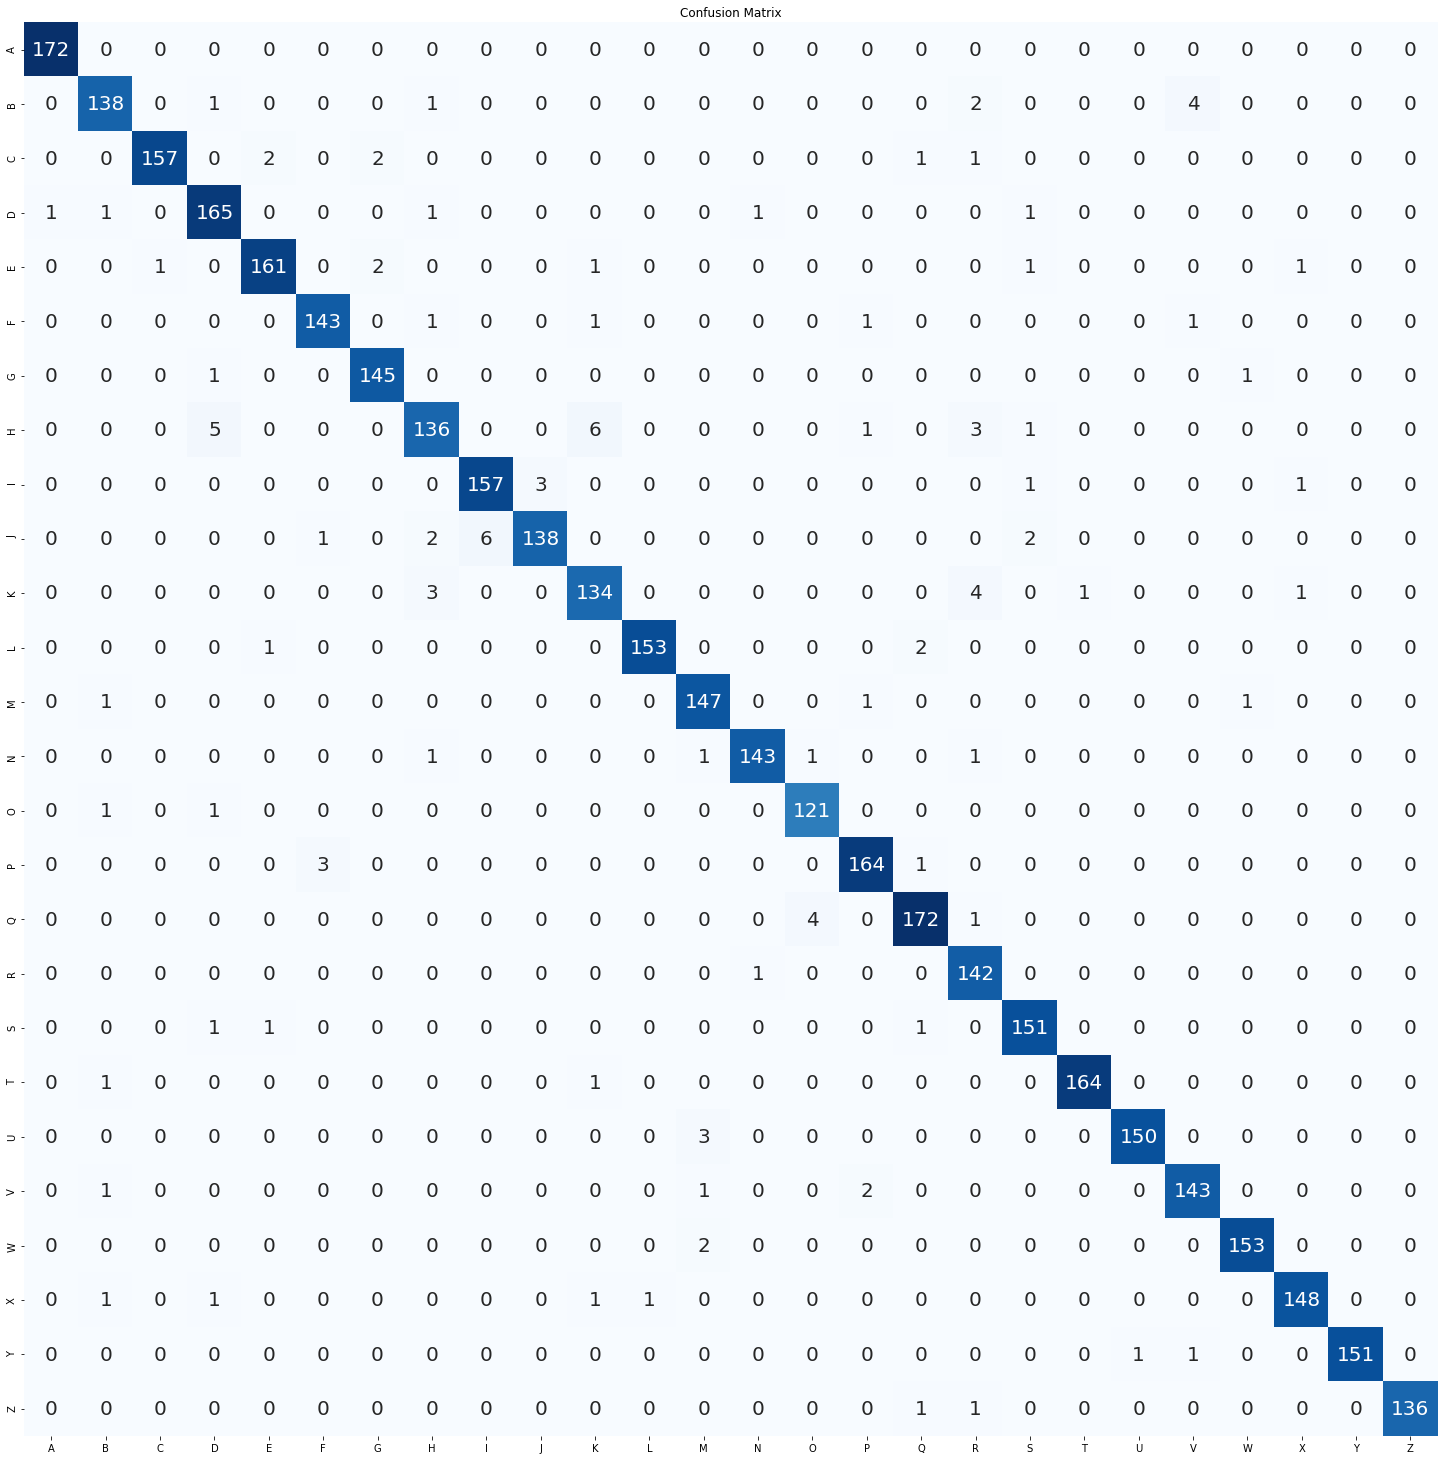

In [96]:
plt.figure(figsize=(26,26))
plt.title("Confusion Matrix")
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True,fmt='.0f', annot_kws={"size": 20},
            cmap="Blues", square=True,cbar=False, xticklabels=letter_list, yticklabels=letter_list)
plt.show()